<a href="https://colab.research.google.com/github/pingli10/Project-2---Part-3--Core--/blob/main/project_2_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

data = '/content/drive/MyDrive/coding dojo/project 2 part 1 1/heart.csv'

Mounted at /content/drive


In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# check missing value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# check duplicate value
df.duplicated().sum()

0

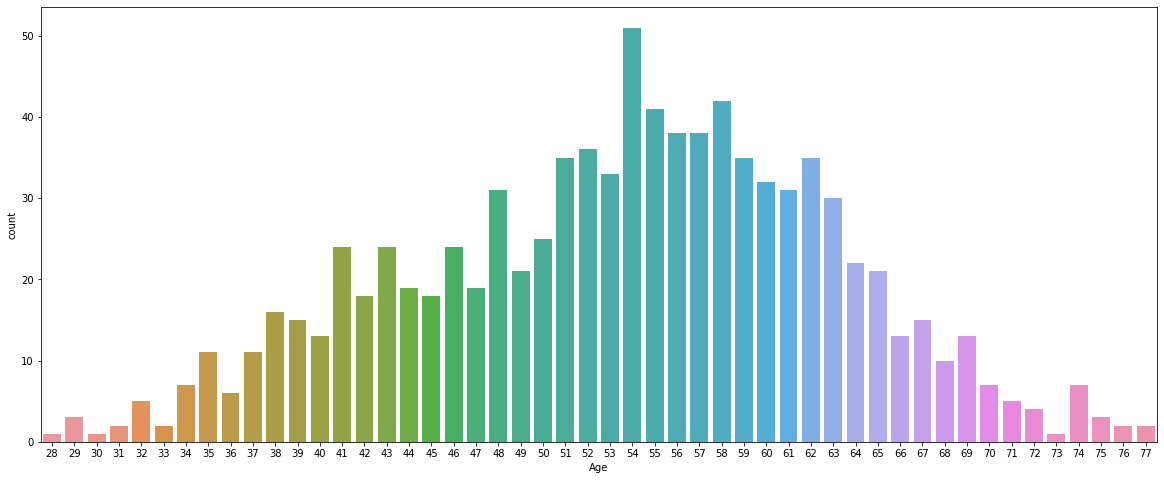

In [7]:
# Age distribution
plt.figure(figsize=(20,8))
sns.countplot(data = df,x='Age')

The graph shows we have great distribution at 50 years old.

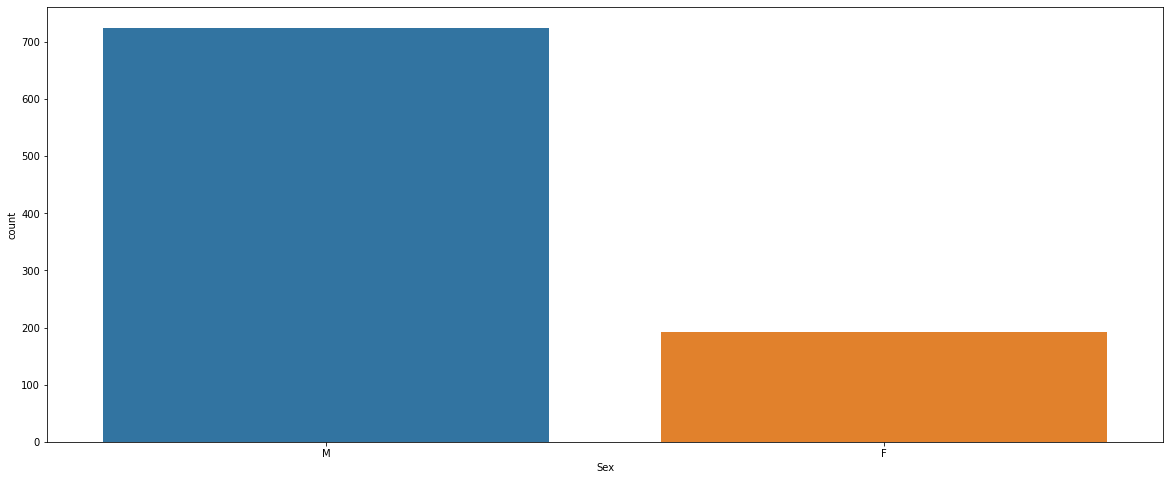

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(data = df,x='Sex');

# The data set has greater distribution in Male than female

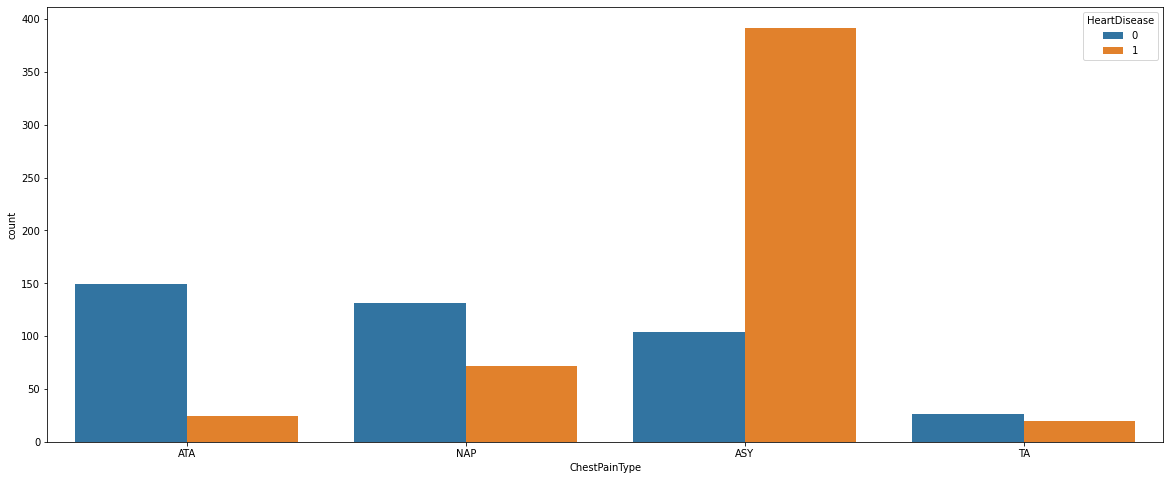

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(data = df,x='ChestPainType',hue='HeartDisease')

see chest pain type group by HeartDiease
Asy chest pain has great distribution in Heart Diease

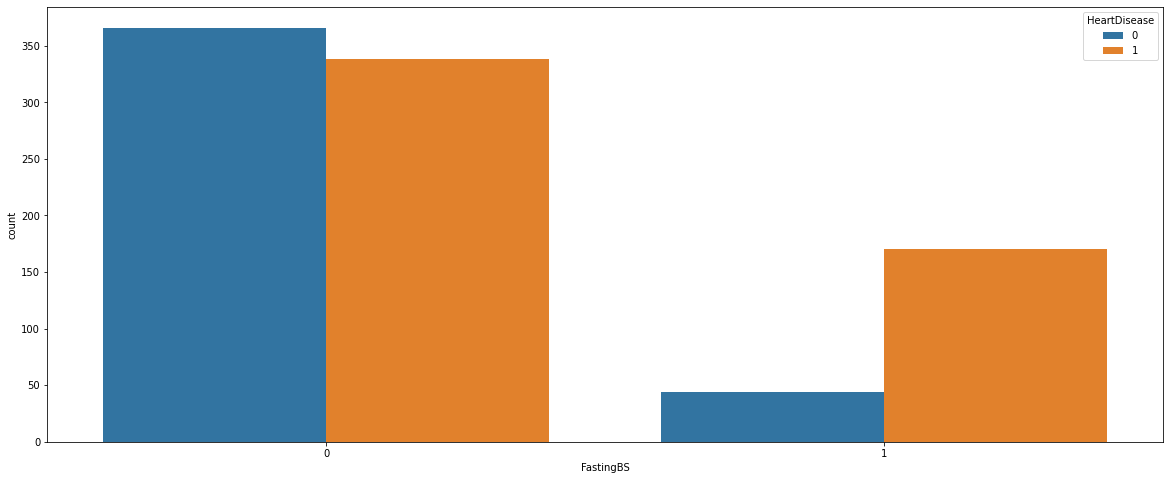

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(data = df,x='FastingBS',hue='HeartDisease')

Higher fastingbs rate does not have related relashionship with HeartDiease.

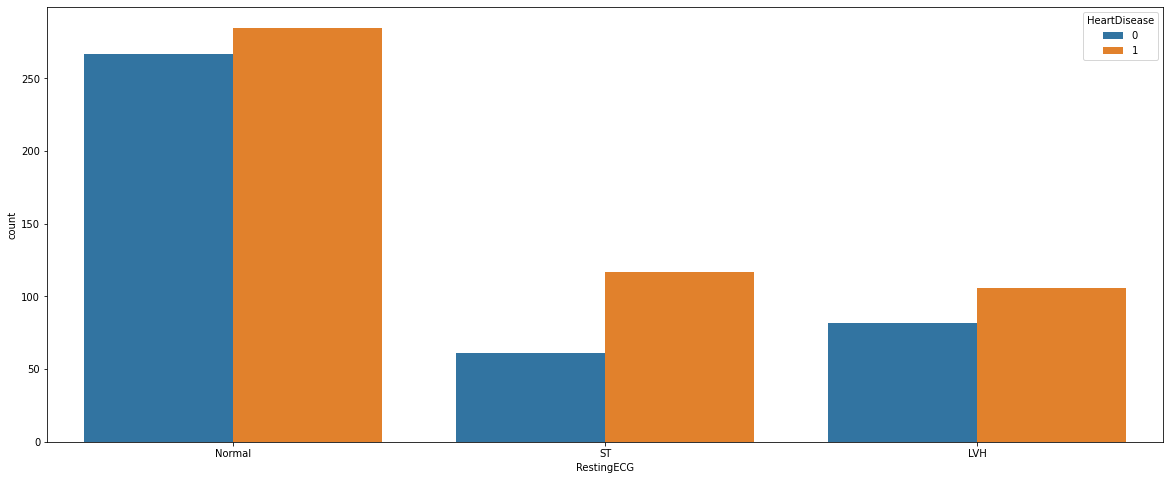

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(data = df,x='RestingECG',hue='HeartDisease')

#Same as the Fastingbs, Normal restingECG have the greatest but same distribution on both nonheartdiese and heartdiese. 

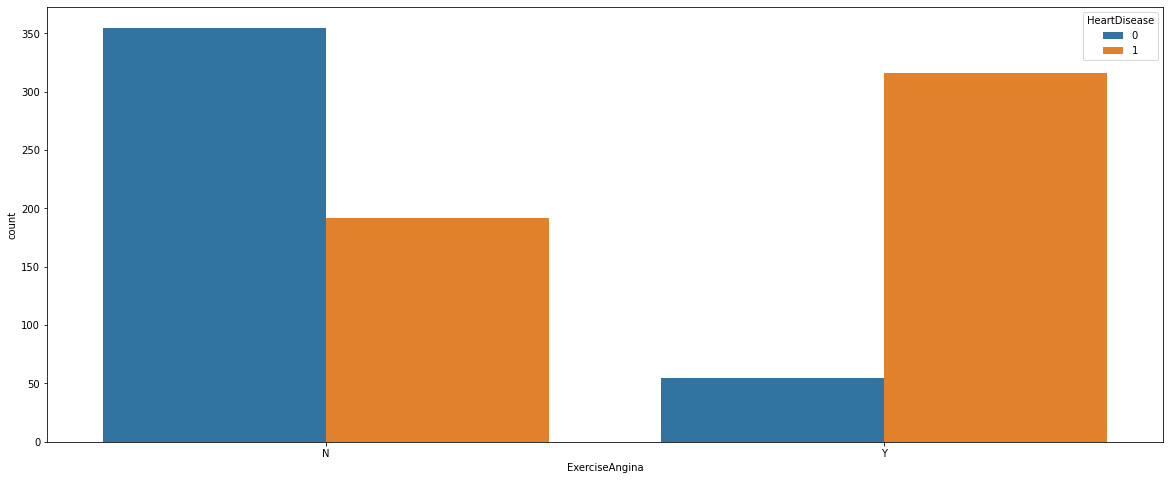

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(data = df,x='ExerciseAngina',hue='HeartDisease')

Y has greater distribution on heartDiease
N has greater distribution on nonheartDiease

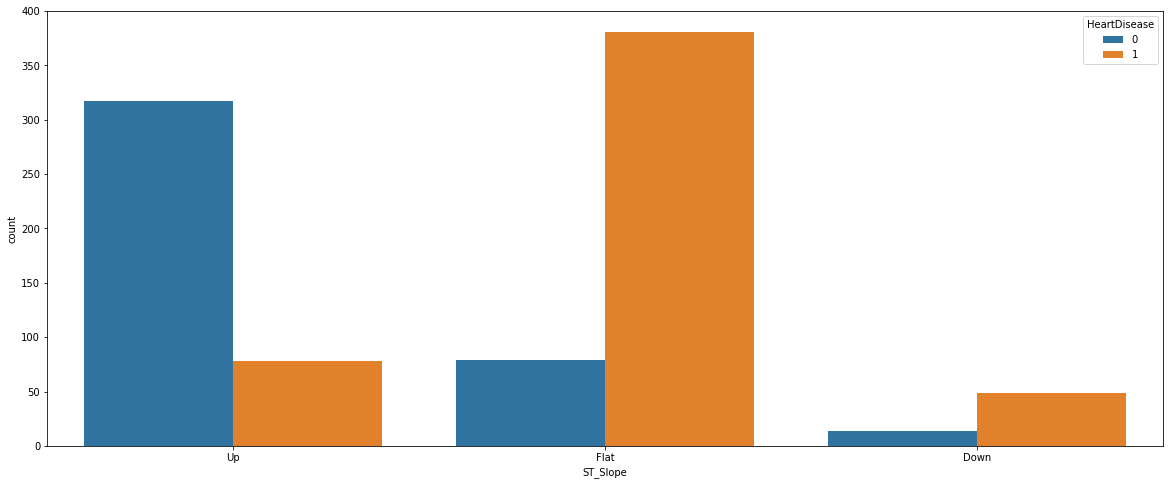

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(data = df,x='ST_Slope',hue='HeartDisease')

Flat has great distribution on heartDiease
up has great disribution on nonheartDiease.
Down has small distribution for both non-heartdiease and heartdiease.

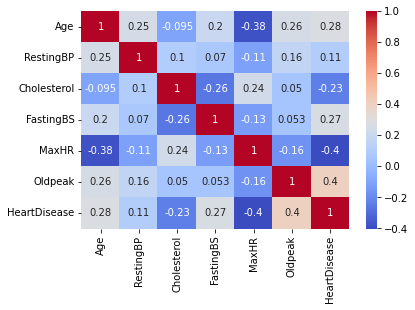

In [14]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [15]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [16]:
# look up any specific value in the data set
str_cols =['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']

# for loop in order to check wrong value
for col in str_cols:
  print(f'column={col}')
  print(df[col].value_counts(dropna=True))
  print('\n\n')

column=Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64



column=Sex
M    725
F    193
Name: Sex, dtype: int64



column=ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64



column=RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64



column=Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222,

In [17]:
# check shape
df.shape

(918, 12)

In [18]:
# check distribution
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [19]:
# check distribution
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [20]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


1) source of data : Heart Failure Prediction Dataset
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

2) Age', 
'Sex', 
'ChestPainType', 
'RestingBP': ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. 
'Cholesterol':Cholesterol is a waxy, fat-like substance that your body needs for good health, but in the right amounts.
'FastingBS':A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours. 
'RestingECG': Resting ECG systems is designed to help improve clinical accuracy and connect you to advanced data analysis tools so you can make decisions 
 'MaxHR': the greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.
 'ExerciseAngina': build up your activity level gradually and take regular breaks.
 'Oldpeak':ST depression induced by exercise relative to rest (
 'ST_Slope':
The ST Segment represents the interval between ventricular depolarization and repolarization
'HeartDisease': yes or no heart diease

3) The target would be HeartDiease

4) This is a classification problem

5) No less meaningful feature.

6) 918 rows in the data

7) I need to encode cat data and numeric data, then to make classification prediction.